## Simple example on MDP

- import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### Define an States, Actions, and Reward

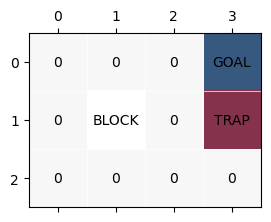

In [2]:
GOAL = (0, 3)
TRAP = (1, 3)
BLOCK = (1, 1)
STATES = {(i, j) for i in range(3) for j in range(4)}
ACTIONS = {"UP": (-1, 0), "DOWN ": (1, 0), "LEFT": (0, -1), "RIGHT": (0, 1)}

def reward(state):
    if state == GOAL:
        return 1
    elif state == TRAP:
        return -1
    elif state == BLOCK:
        return np.nan
    else:
        return 0

def plot_values(values):
    fig, ax = plt.subplots(figsize=(3, 4))
    vals = []
    for i in range(3):
        row = []
        for j in range(4):
            row.append(values[(i, j)])
        vals.append(row)
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    for i in range(3):
        for j in range(4):
            ax.plot([j-0.5, j-0.5], [i-0.5, i+0.5], c="white", linewidth=0.5)
            ax.plot([j-0.5, j+0.5], [i-0.5, i-0.5], c="white", linewidth=0.5)
            if (i, j) == GOAL:
                ax.text(j, i, "GOAL", va="center", ha="center")
            elif (i, j) == TRAP:
                ax.text(j, i, "TRAP", va="center", ha="center")
            elif (i, j) == BLOCK:
                ax.text(j, i, "BLOCK", va="center", ha="center")
            else:
                ax.text(j, i, str(round(vals[i][j], 2)), va="center", ha="center")
    plt.show()

values = {state:reward(state) for state in STATES}
plot_values(values)

### Define transition

In [3]:
def transition(state, action):
    if state in {GOAL, TRAP}:
        return state
    step = ACTIONS[action]
    next_state = (state[0] + step[0], state[1] + step[1])
    if next_state == BLOCK:
        return state
    if next_state in STATES:
        return next_state
    return state

start_point = (0, 0)
for action in ACTIONS:
    print(start_point, action, transition(start_point, action))

(0, 0) UP (0, 0)
(0, 0) DOWN  (1, 0)
(0, 0) LEFT (0, 0)
(0, 0) RIGHT (0, 1)


### Define policy

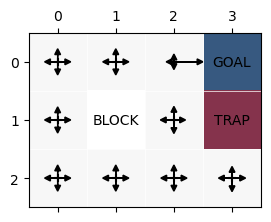

In [4]:
def update_policy(values, noise= 0.2):
    policy = {}
    for state in STATES:
        policy[state] = {}
        if state in {GOAL, TRAP, BLOCK}:
            continue
        max_val = float("-inf")
        
        for action, action_val in ACTIONS.items():
            next_state = transition(state, action)
            val = values[next_state]
            policy[state][action] = val
            if val > max_val:
                max_val = val
        
        count_max = sum(1 for val in policy[state].values() if val == max_val)
        count_other = len(policy[state]) - count_max
        for action, val in policy[state].items():
            if val == max_val:
                policy[state][action] = 1/count_max
                if count_other > 0:
                    policy[state][action] *= (1-noise)
            elif count_other > 0:
                policy[state][action] = noise/count_other
           
    return policy


def plot_policy(values):
    policy = update_policy(values)
    fig, ax = plt.subplots(figsize=(3, 4))
    vals = np.zeros((3, 4))
    for state in policy.keys():
        ax.plot([state[1]-0.5, state[1]-0.5], [state[0]-0.5, state[0]+0.5], c="white", linewidth=0.5)
        ax.plot([state[1]-0.5, state[1]+0.5], [state[0]-0.5, state[0]-0.5], c="white", linewidth=0.5)
        vals[state[0]][state[1]] = values[state]
        if state == GOAL:
            ax.text(state[1], state[0], "GOAL", va="center", ha="center")
            continue
        if state == TRAP:
            ax.text(state[1], state[0], "TRAP", va="center", ha="center")
            continue
        if state == BLOCK:
            vals[state[0]][state[1]] = np.nan
            ax.text(state[1], state[0], "BLOCK", va="center", ha="center")
            continue
        ax.scatter(state[1], state[0], c="black", marker="+")
        for action in policy[state].keys():
            arrow_len = policy[state][action]/2
            if arrow_len == 0:
                continue
            if action == "UP":
                ax.arrow(state[1], state[0], 
                        0, -arrow_len, 
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "DOWN ":
                ax.arrow(state[1], state[0], 
                        0, arrow_len, 
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "LEFT":
                ax.arrow(state[1], state[0], 
                        -arrow_len, 0, 
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
            elif action == "RIGHT":
                ax.arrow(state[1], state[0], 
                        arrow_len, 0, 
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    plt.show()

policy = update_policy(values)
plot_policy(values)

### Utility

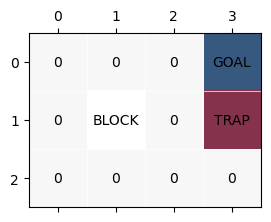

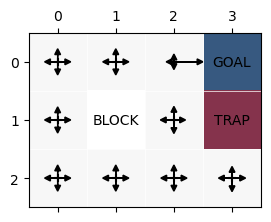

In [16]:
GAMMA = 0.9

def value_iteration(values, policy, iterations=100):
    for _ in range(iterations):
        new_values = {state: 0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = val
        values = new_values
        policy = update_policy(values)

    return values, policy

values = {state:reward(state) for state in STATES}
policy = update_policy(values)
utilities, policy = value_iteration(values, policy, 0)
plot_values(utilities)
plot_policy(utilities)

- 1 iteration

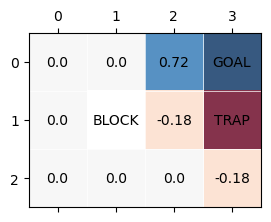

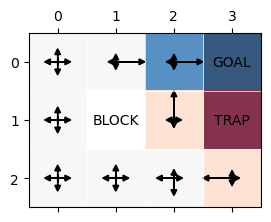

In [17]:
utilities, policy = value_iteration(values, policy, 1)
plot_values(utilities)
plot_policy(utilities)

- 3 iterations

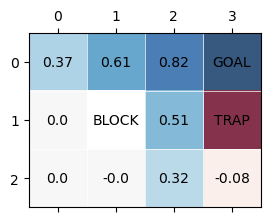

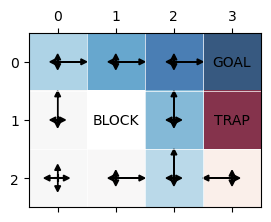

In [18]:
utilities, policy = value_iteration(values, policy, 3)
plot_values(utilities)
plot_policy(utilities)

- 100 iterations

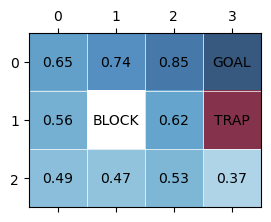

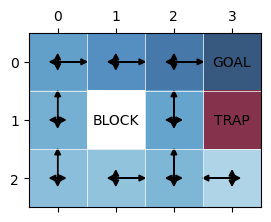

In [19]:
utilities, policy = value_iteration(values, policy, 100)
plot_values(utilities)
plot_policy(utilities)

### Bellman optimization

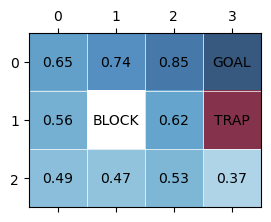

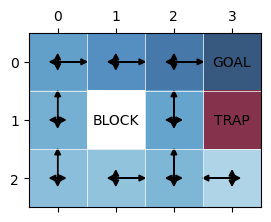

In [20]:
def bellman_optimization(epsilon= 0.00001 , max_iter = 1000):
    def general_reward(values):
        return sum(values.values())

    values = {state: 0 for state in STATES}
    policy = update_policy(values)
    R = float("inf")
    delta = float("inf")
    counter = 0
    while delta > epsilon or counter < max_iter:
        new_values = {state: 0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = val
        values = new_values
        policy = update_policy(values)
        delta = abs(R - general_reward(values))
        R = general_reward(values)
        counter += 1
    return values, policy

utilities, policy = bellman_optimization()
plot_values(utilities)
plot_policy(utilities)

### Q-Learning

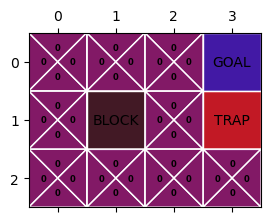

In [21]:
q_values = {state: {action: 0 for action in ACTIONS} for state in STATES}

def plot_q_values(q_values):
    def color_map(value, min= -1, max= 1, alpha= 0.5):
        if value < min:
            value = min
        if value > max:
            value = max
        color = (max - value) / (max - min)
        return (color, 0, 1 - color, alpha)

    fig, ax = plt.subplots(figsize=(3, 4))
    vals = np.zeros((3, 4))
    ax.matshow(vals, cmap="RdBu", alpha=0.8)
    for state in q_values.keys():
        if state in {GOAL, TRAP, BLOCK}:
            rectangle = plt.Polygon([[state[1]-0.5, state[0]-0.5],
                                    [state[1]+0.5, state[0]-0.5],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]+0.5]],
                                    closed=True,
                edgecolor="white", facecolor=color_map(reward(state)))
            ax.add_artist(rectangle)
            continue
        q_values[state].update({action: round(val, 2) 
            for action, val in q_values[state].items()})


    for state in q_values.keys():
        ax.plot([state[1]-0.5, state[1]+0.5], [state[0]-0.5, state[0]-0.5], 
            c="white", linewidth=0.5)  
        ax.plot([state[1]+0.5, state[1]+0.5], [state[0]-0.5, state[0]+0.5],
            c="white", linewidth=0.5) 
            
        if state == GOAL:
            ax.text(state[1], state[0], "GOAL", va="center", ha="center")
            continue
        if state == TRAP:
            ax.text(state[1], state[0], "TRAP", va="center", ha="center")
            continue
        if state == BLOCK:
            ax.text(state[1], state[0], "BLOCK", va="center", ha="center")
            continue
        
        font_size = 6
        max_val = max(q_values[state].values())
        for action, val in q_values[state].items():
            bold = "bold" if val == max_val else "normal"
            if action == "UP":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]-0.5],
                                    [state[1]-0.5, state[0]-0.5]],
                                    closed=True, 
                                    edgecolor="white", 
                                    facecolor=color_map(val))   
                ax.add_artist(triangle)
                ax.text(state[1], state[0]-0.25, str(round(val, 2)), 
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "DOWN ":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]+0.5]],
                                    closed=True, 
                                    edgecolor="white", 
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1], state[0]+0.25, str(round(val, 2)), 
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "LEFT":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]-0.5, state[0]+0.5],
                                    [state[1]-0.5, state[0]-0.5]],
                                    closed=True, 
                                    edgecolor="white", 
                                    facecolor=color_map(val))
                ax.add_artist(triangle) 
                ax.text(state[1]-0.25, state[0], str(round(val, 2)), 
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            elif action == "RIGHT":
                triangle = plt.Polygon([[state[1], state[0]],
                                    [state[1]+0.5, state[0]+0.5],
                                    [state[1]+0.5, state[0]-0.5]],
                                    closed=True, 
                                    edgecolor="white", 
                                    facecolor=color_map(val))
                ax.add_artist(triangle)
                ax.text(state[1]+0.25, state[0], str(round(val, 2)), 
                    va="center", ha="center", fontsize=font_size, fontweight=bold)
            
    plt.show()

plot_q_values(q_values)

- get q_values

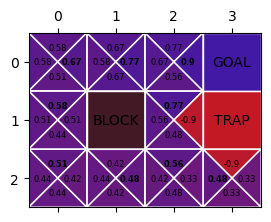

In [22]:
def q_learning(epsilon= 0.00001 , max_iter = 1000):
    q_values = {state: {action: 0 for action in ACTIONS} for state in STATES}
    def general_reward(values):
        return sum(values.values())

    values = {state: 0 for state in STATES}
    policy = update_policy(values)
    R = float("inf")
    delta = float("inf")
    counter = 0
    while delta > epsilon or counter < max_iter:
        new_values = {state: 0 for state in STATES}
        for state in STATES:
            if state in {GOAL, TRAP, BLOCK}:
                new_values[state] = reward(state)
                continue
            val = 0
            for action, p in policy[state].items():
                next_state = transition(state, action)
                q_values[state][action] = reward(state) + GAMMA * values[next_state]
                val += p * (reward(state) + GAMMA * values[next_state])
            new_values[state] = val
        values = new_values
        policy = update_policy(values)
        delta = abs(R - general_reward(values))
        R = general_reward(values)
        counter += 1
    return q_values, policy

q_values, policy = q_learning()
plot_q_values(q_values)
